# BE Final Project: House Price Pridection

## 1. Data Preprocessing

### 1.1 Importing Required Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

### 1.2 Data Acquisition and DataFrame Creation

In [2]:
df = pd.read_csv('../CSV/India.csv', index_col=False)

### 1.3 Data Evaluation

In [3]:
df.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,Banglore,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Banglore,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Banglore,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Banglore,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Banglore,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.size

413813

In [5]:
df.shape

(10093, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10093 entries, 0 to 10092
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                10093 non-null  int64 
 1   Area                 10093 non-null  int64 
 2   City                 10093 non-null  object
 3   Location             10093 non-null  object
 4   No. of Bedrooms      10093 non-null  int64 
 5   Resale               10093 non-null  int64 
 6   MaintenanceStaff     10093 non-null  int64 
 7   Gymnasium            10093 non-null  int64 
 8   SwimmingPool         10093 non-null  int64 
 9   LandscapedGardens    10093 non-null  int64 
 10  JoggingTrack         10093 non-null  int64 
 11  RainWaterHarvesting  10093 non-null  int64 
 12  IndoorGames          10093 non-null  int64 
 13  ShoppingMall         10093 non-null  int64 
 14  Intercom             10093 non-null  int64 
 15  SportsFacility       10093 non-null  int64 
 16  ATM 

In [7]:
df.columns

Index(['Price', 'Area', 'City', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [8]:
df.isnull().sum()

Price                  0
Area                   0
City                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


In [9]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,1.009300e+04,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,...,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000,10093.000000
mean,1.036314e+07,1349.034777,2.459625,0.342515,0.170415,0.520757,0.414941,0.349054,0.333300,0.367681,...,0.716536,0.091053,0.297929,0.048648,0.021599,0.055583,0.052710,0.050926,0.020906,0.051422
std,1.360081e+07,707.857363,0.759717,0.474574,0.376016,0.499594,0.492736,0.476695,0.471416,0.482198,...,0.450702,0.287699,0.457371,0.215141,0.145378,0.229126,0.223465,0.219858,0.143075,0.220867
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+06,935.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.970999e+06,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.180000e+07,1603.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000e+08,9900.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Splitting Data: Dependent and Independent Variables

In [10]:
# Here df.sample is used to sample out data and assign it to df1 (frac = 1 states that 100% of data from df is sampled and assigned to df1).
# If df1 = df would be used, then changes made in df1 will be replicated into df.
# df is used for preserving global status of csv file.

df1 = df.sample(frac = 1)
df1.shape

(10093, 41)

In [11]:
data = df1.drop('Price', axis = 1)
data.head()

,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
5996,1350,Delhi,Alaknanda,2,1,0,0,0,0,0,...,0,1,0,1,0,1,1,1,0,1
2705,1068,Chennai,Madipakkam,2,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
6857,1050,Hyderabad,Kompally,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6543,1330,Hyderabad,Kondakal,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3703,875,Chennai,Maduravoyal,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
price = df1['Price']
price.head()

5996    17500000
2705     8589000
6857     5800000
6543     7500000
3703     4500000
Name: Price, dtype: int64

## 2. Data Transfromation and Scaling

### 2.1 Encoding Data: Label Encoding

In [13]:
# Checking that, is it feasible to use Label Encoding for 'Location column'?
# ---> Yes, Because the no.of Total Rows are 7719 and No. of unique values for Location are 413.

df['Location'].unique()
df['Location'].unique().size

849

In [14]:
df['City'].unique()
df['City'].unique().size

6

In [15]:
# from sklearn.preprocessing ---> LabelEncoder

label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [16]:
df_le = df1.copy()
df_le['Location'] = label_encoder.fit_transform(df['Location'])

In [17]:
df_le.head()

,Price,Area,City,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
5996,17500000,1350,Delhi,254,2,1,0,0,0,0,...,0,1,0,1,0,1,1,1,0,1
2705,8589000,1068,Chennai,155,2,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
6857,5800000,1050,Hyderabad,302,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6543,7500000,1330,Hyderabad,163,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3703,4500000,875,Chennai,319,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_le['Location'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10093 entries, 5996 to 4742
Series name: Location
Non-Null Count  Dtype
--------------  -----
10093 non-null  int32
dtypes: int32(1)
memory usage: 118.3 KB


C:\Users\Sangram More\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

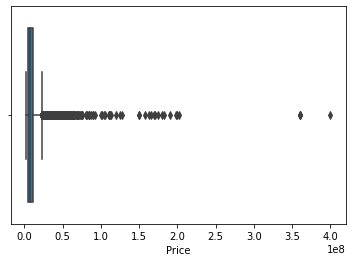

In [26]:
sns.boxplot(df_le['Price'])

### 2.2 Encoding Data: One Hot Encoding

In [20]:
# from sklearn.preprocessing ---> OneHotEncoder

# df_ohe = df1.copy()
# ohe = OneHotEncoder()
# print(ohe)

In [21]:
# feature_array = ohe.fit_transform(df_ohe[['Location']]).toarray()

In [22]:
# feature_array = feature_array[:,1:]
# column_names = df_ohe['Location'].tolist()

In [23]:
# df_ohe.drop('Location', axis = 1)
# pd.DataFrame(feature_array, columns = column_names)

### 2.3 Data Scaling

In [24]:
# scaler = MinMaxScaler()
